##**Working on " MNIST Fashion Dataset "**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### load dataset

In [2]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist

 # split into tetsing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# let's have a look at one pixel
train_images[0,23,23]

194

In [7]:
# have a look at the first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

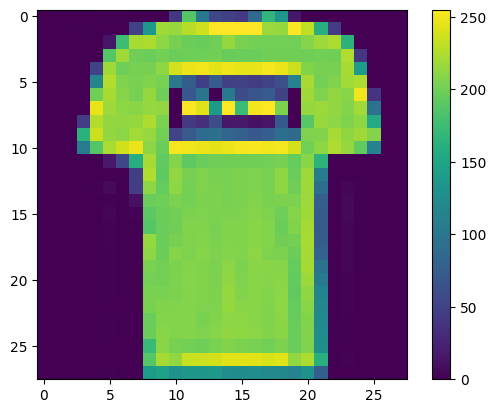

In [11]:
#look at what some of these images look like!
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

####**Data Preprocessing**

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#####**Building the Model**

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

######**Compile the Model**

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

######**Training the Model**

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5082 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3787 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3396 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3170 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2975 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2828 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2688 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2595 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2497 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss

# **Evaluating the Model**

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8832
Test accuracy: 0.8831999897956848


###**Making Predictions**

In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

#####**Verifying Predictions**

313/313 [==============================] - 1s 2ms/step
Ankle boot


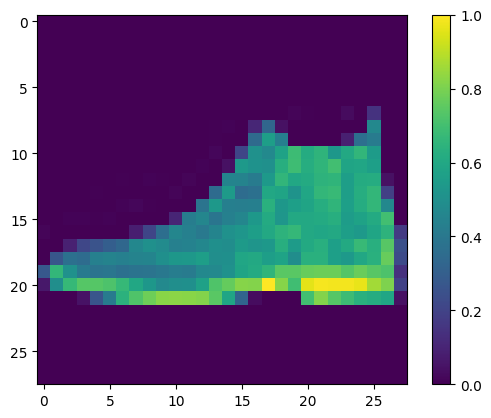

In [36]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Pick a number: 30
1/1 [==============================] - 0s 22ms/step


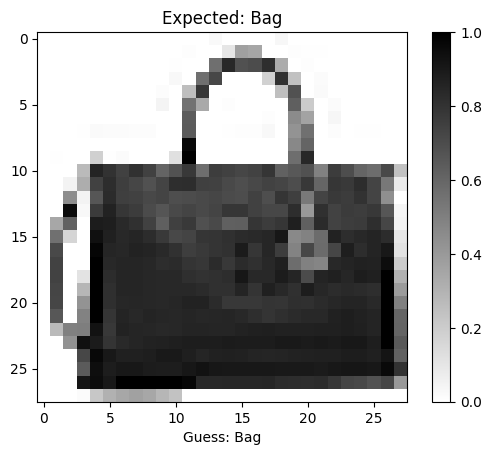

In [40]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return num
        else:
            print("Try again...")


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)